![example](images/director_shot.jpeg)

# Project Title

**Authors:** John, Wilber, Maureen,Stella, Isaiah
***

## Overview

Rilsoft aims to capitalize on the rising trend of movie creation by establishing a new studio. As newcomers to the industry, the team seeks to leverage data from leading movie review platforms to generate actionable insights that will guide their entry into the competitive movie-making landscape.

## Business Problem

Rilsoft wants to venture in the movie industry to compete with other big companies that create original video content. They have the challenge of determining optimal approach to the market. The problem is how to balance financial investment, creative vision and market demand.

***
## Objectives:
* To understand  high-performing movie genres and provide recommendations based on film genres with the highest ratings`
* To understand revenue projections and ROI based on the  various movie genres.
* To help fomulate budget allocation
* To understand marketing strategies
* To help in analyzing the various roles for creative movie production
***

***
## Business Questions:
* Which audience demographics are most likely to engage with high-rated, high-ROI movie genres?
* What movie genres consistently deliver the best ratings and return on investment for budget allocation?
* How can marketing strategies be optimized based on the performance of top-rated movie genres and audience preferences?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [151]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [152]:
# Here you run your code to explore the data
conn=sqlite3.connect('Datasets/im.db')

df_imdb = pd.read_sql("""SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';""", conn)
cursor = conn.cursor()
df_imdb

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [153]:
first_query = """SELECT * FROM movie_basics;"""

# Use the line below to check your query's output
pd.read_sql(first_query, conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [154]:
Querry = """SELECT * FROM persons;"""

# Use the line below to check your query's output
pd.read_sql(Querry, conn).head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [155]:
df_gross=pd.read_csv('Datasets/bom.movie_gross.csv')
df_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [156]:
df_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [157]:
df_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [158]:
df_gross['foreign_gross']= df_gross['foreign_gross'].replace('[,\'NaN'']', '0', regex=True).astype(float)
df_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [159]:
df_gross['foreign_gross'].fillna(df_gross['foreign_gross'].std(), inplace=True)
df_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010
1,Alice in Wonderland (2010),BV,334200000.0,6.913000e+08,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,6.643000e+08,2010
3,Inception,WB,292600000.0,5.357000e+08,2010
4,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,1.374106e+08,2018
3383,Edward II (2018 re-release),FM,4800.0,1.374106e+08,2018
3384,El Pacto,Sony,2500.0,1.374106e+08,2018
3385,The Swan,Synergetic,2400.0,1.374106e+08,2018


In [160]:
df2=pd.read_csv('Datasets/tmdb.movies.csv')
df2

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


 **Duplicate column- title

In [161]:
df_budgets=pd.read_csv('Datasets/tn.movie_budgets.csv')
df_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [162]:
df4=pd.read_csv('Datasets/rt.movie_info.tsv', sep='\t')
df4

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [163]:
# Checking for null values
df4.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [164]:
df5=pd.read_csv('Datasets/rt.reviews.tsv', sep='\t', encoding='latin-1')
df5

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


## Data sources and Relevance

The data comes from several reputable sources in the movie industry, including Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers. These datasets provide insights into various aspects of movie performance e.g BOM Detailed information on movie performances, release years, and industry statistics.These datasets collectively address questions about box office trends, movie profitability, audience preferences, and the relationship between budgets and revenue.Hence,the choice of datasets that would help us achieve the objectives are; the imdb dataset,bom.movie gross dataset and TN.movie budgets dataset

The Target variables include but not limited to;
Revenue data (domestic_gross, foreign_gross, worldwide_gross).
Budget data (production_budget).
Popularity metrics (popularity, rating, vote_count).
Categorical information (studio, original_language,ages, genre_ids)

The dataset variables to be utilized here are both quantitative and qualitative(categorical)




## Data Preparation/cleaning

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [165]:
#Get all movies with their ratings
movie_ratings = ("""SELECT 
    mb.movie_id,
    mb.original_title,
    mb.primary_title, 
    mb.start_year, 
    mb.genres,
    mr.averagerating, 
    mr.numvotes,
    dr.person_id,
    pr.primary_name,
    pr.primary_profession
FROM movie_basics mb
JOIN movie_ratings mr 
ON mb.movie_id = mr.movie_id
JOIN known_for dr
ON mb.movie_id = dr.movie_id
JOIN persons pr
ON pr.person_id = dr.person_id
""")
df_movie_ratings = pd.read_sql(movie_ratings,conn)
df_movie_ratings


,movie_id,original_title,primary_title,start_year,genres,averagerating,numvotes,person_id,primary_name,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,nm1194313,Mahasweta Devi,writer
1,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,nm1391276,Anjana Rawail,"writer,costume_designer"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517,nm0000953,Peter Bogdanovich,"actor,director,writer"
3,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517,nm0462648,Oja Kodar,"actress,writer,director"
4,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517,nm0600800,Leslie Moonves,"actor,executive,producer"
...,...,...,...,...,...,...,...,...,...,...
526723,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,"Drama,Family",8.7,136,nm4394529,Ahmet Faik Akinci,"director,writer"
526724,tt9914642,Albatross,Albatross,2017,Documentary,8.5,8,nm3980661,Jim Hurst,"camera_department,cinematographer,sound_depart..."
526725,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,None,6.6,5,nm1434828,Aleix Castellón,"production_manager,editorial_department,producer"
526726,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,None,6.6,5,nm3827360,Joan Amargós,actor


In [166]:
df_movie_ratings

,movie_id,original_title,primary_title,start_year,genres,averagerating,numvotes,person_id,primary_name,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,nm1194313,Mahasweta Devi,writer
1,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,nm1391276,Anjana Rawail,"writer,costume_designer"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517,nm0000953,Peter Bogdanovich,"actor,director,writer"
3,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517,nm0462648,Oja Kodar,"actress,writer,director"
4,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517,nm0600800,Leslie Moonves,"actor,executive,producer"
...,...,...,...,...,...,...,...,...,...,...
526723,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,"Drama,Family",8.7,136,nm4394529,Ahmet Faik Akinci,"director,writer"
526724,tt9914642,Albatross,Albatross,2017,Documentary,8.5,8,nm3980661,Jim Hurst,"camera_department,cinematographer,sound_depart..."
526725,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,None,6.6,5,nm1434828,Aleix Castellón,"production_manager,editorial_department,producer"
526726,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,None,6.6,5,nm3827360,Joan Amargós,actor


In [167]:
#checking for null values

df_movie_ratings.isna().sum()

movie_id                  0
original_title            0
primary_title             0
start_year                0
genres                 3452
averagerating             0
numvotes                  0
person_id                 0
primary_name              0
primary_profession    20692
dtype: int64

No null values were found in the dataset

In [168]:

#Checking for duplicates
df_movie_ratings.duplicated().value_counts()

False    526728
dtype: int64

In [169]:
#summary statistics
df_movie_ratings.describe()

,start_year,averagerating,numvotes
count,526728.000000,526728.000000,5.267280e+05
mean,2014.301427,6.331255,1.977428e+04
std,2.560814,1.434490,8.711638e+04
min,2010.000000,1.000000,5.000000e+00
25%,2012.000000,5.500000,2.000000e+01
50%,2014.000000,6.500000,1.040000e+02
75%,2016.000000,7.300000,1.050000e+03
max,2019.000000,10.000000,1.841066e+06


In [170]:
#data types
df_movie_ratings.dtypes

movie_id               object
original_title         object
primary_title          object
start_year              int64
genres                 object
averagerating         float64
numvotes                int64
person_id              object
primary_name           object
primary_profession     object
dtype: object

There are no duplicates in the dataset

In [171]:
#Get most popular genres based on number of votes:

pop_genres = ("""SELECT 
    mb.genres, 
    COUNT(mr.numvotes) AS total_votes,
    AVG(mr.averagerating) AS avg_rating
FROM movie_basics mb
JOIN movie_ratings mr 
ON mb.movie_id = mr.movie_id
GROUP BY mb.genres
ORDER BY total_votes DESC;""")
pop_genres_df = pd.read_sql(pop_genres,conn)


In [172]:
#checking for null values
pop_genres_df.isna().sum()

genres         1
total_votes    0
avg_rating     0
dtype: int64

In [173]:
#Replacing the null value with mode

pop_genres_df['genres'].fillna(pop_genres_df['genres'].mode()[0], inplace=True)



In [174]:
#The null value has been replace by mode

pop_genres_df.isna().sum()

genres         0
total_votes    0
avg_rating     0
dtype: int64

In [175]:
#checking for duplicates
pop_genres_df.duplicated().value_counts()

False    924
dtype: int64

There are no duplicates on the dataset

In [176]:
#Summary Statistics
pop_genres_df.describe()

,total_votes,avg_rating
count,924.000000,924.000000
mean,79.930736,6.280216
std,569.601986,1.053560
min,1.000000,1.400000
25%,2.000000,5.683482
50%,5.000000,6.300000
75%,29.000000,6.973125
max,11612.000000,9.400000


In [177]:
df_budgets.rename(columns={'movie': 'movie_title'}, inplace=True)

matched_df = df_movie_ratings.merge(df_budgets, left_on='original_title', right_on='movie_title', how='inner')
matched_df


,movie_id,original_title,primary_title,start_year,genres,averagerating,numvotes,person_id,primary_name,primary_profession,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm0103750,Wayne Brady,"actor,writer,producer",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm0841854,Rebecca Swanson,"writer,miscellaneous",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
2,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm3388028,Loressa Clisby,"visual_effects,art_director,director",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
3,tt0326592,The Overnight,The Overnight,2010,None,7.5,24,nm0330085,Chris M. Gordon,"editor,miscellaneous,producer",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
4,tt0326592,The Overnight,The Overnight,2010,None,7.5,24,nm1170333,Kacey Arnold,"miscellaneous,writer,producer",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53591,tt9024106,Unplanned,Unplanned,2019,"Biography,Drama",6.3,5945,nm6853305,Maura Corsini,actress,33,"Mar 29, 2019",Unplanned,"$6,000,000","$18,107,621","$18,107,621"
53592,tt9024106,Unplanned,Unplanned,2019,"Biography,Drama",6.3,5945,nm7839151,Joe Knopp,"producer,actor",33,"Mar 29, 2019",Unplanned,"$6,000,000","$18,107,621","$18,107,621"
53593,tt9024106,Unplanned,Unplanned,2019,"Biography,Drama",6.3,5945,nm7968007,Parker Adams,"visual_effects,editor,editorial_department",33,"Mar 29, 2019",Unplanned,"$6,000,000","$18,107,621","$18,107,621"
53594,tt9024106,Unplanned,Unplanned,2019,"Biography,Drama",6.3,5945,nm8736182,Megan Harrington,"producer,miscellaneous",33,"Mar 29, 2019",Unplanned,"$6,000,000","$18,107,621","$18,107,621"


In [178]:
matched_df.columns

Index(['movie_id', 'original_title', 'primary_title', 'start_year', 'genres',
       'averagerating', 'numvotes', 'person_id', 'primary_name',
       'primary_profession', 'id', 'release_date', 'movie_title',
       'production_budget', 'domestic_gross', 'worldwide_gross'],
      dtype='object')

In [179]:
#Checking for null values

matched_df.isnull().sum()

movie_id                0
original_title          0
primary_title           0
start_year              0
genres                 21
averagerating           0
numvotes                0
person_id               0
primary_name            0
primary_profession    285
id                      0
release_date            0
movie_title             0
production_budget       0
domestic_gross          0
worldwide_gross         0
dtype: int64

 No null values found

In [180]:
#Checking for duplicates 

matched_df.duplicated().value_counts()

False    53596
dtype: int64

No duplicates found

In [181]:
#Summary statistics
matched_df.describe()

,start_year,averagerating,numvotes,id
count,53596.000000,53596.000000,5.359600e+04,53596.000000
mean,2013.944791,6.526526,1.645136e+05,50.856668
std,2.515101,1.031386,2.170042e+05,28.401679
min,2010.000000,1.600000,5.000000e+00,1.000000
25%,2012.000000,5.900000,2.893100e+04,27.000000
50%,2014.000000,6.600000,8.583100e+04,51.000000
75%,2016.000000,7.200000,2.205670e+05,75.000000
max,2019.000000,9.300000,1.841066e+06,100.000000


In [182]:
columns_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']
for column in columns_to_clean:
    matched_df[column] = matched_df[column].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [183]:
matched_df.dtypes

movie_id               object
original_title         object
primary_title          object
start_year              int64
genres                 object
averagerating         float64
numvotes                int64
person_id              object
primary_name           object
primary_profession     object
id                      int64
release_date           object
movie_title            object
production_budget     float64
domestic_gross        float64
worldwide_gross       float64
dtype: object

#### Feature Engineering

In [184]:
#Calculating 
matched_df['gross_earnings'] = matched_df['worldwide_gross']-matched_df['production_budget']
matched_df.columns

Index(['movie_id', 'original_title', 'primary_title', 'start_year', 'genres',
       'averagerating', 'numvotes', 'person_id', 'primary_name',
       'primary_profession', 'id', 'release_date', 'movie_title',
       'production_budget', 'domestic_gross', 'worldwide_gross',
       'gross_earnings'],
      dtype='object')

In [185]:
output_path = "Movies_data.csv"
matched_df.to_csv(output_path, index=False)

## Visualization

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

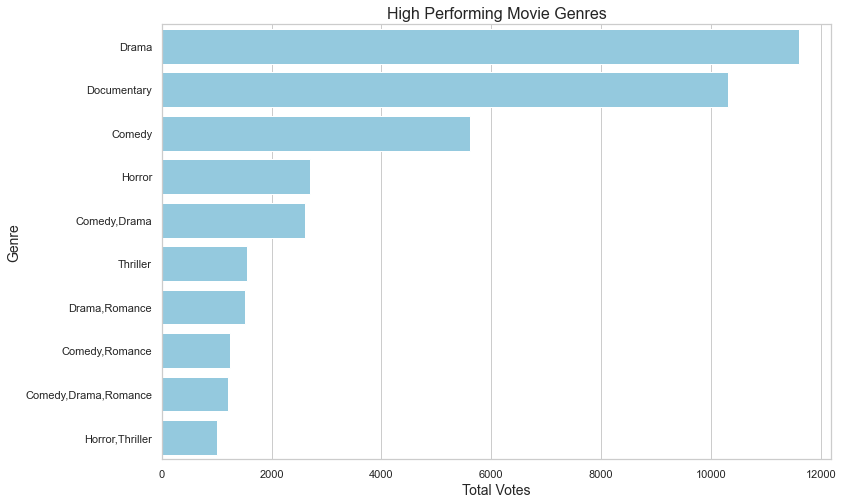

In [186]:
#Bar Graph showing high-performing movie genres
plt.figure(figsize=(12, 8))
sns.barplot(x='total_votes', y='genres', data=pop_genres_df.head(10), color='skyblue')

# Add title and labels
plt.title('High Performing Movie Genres', fontsize=16)
plt.xlabel('Total Votes', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.show()

Drama was the highest performing genre followed closely by documentaries and comedy

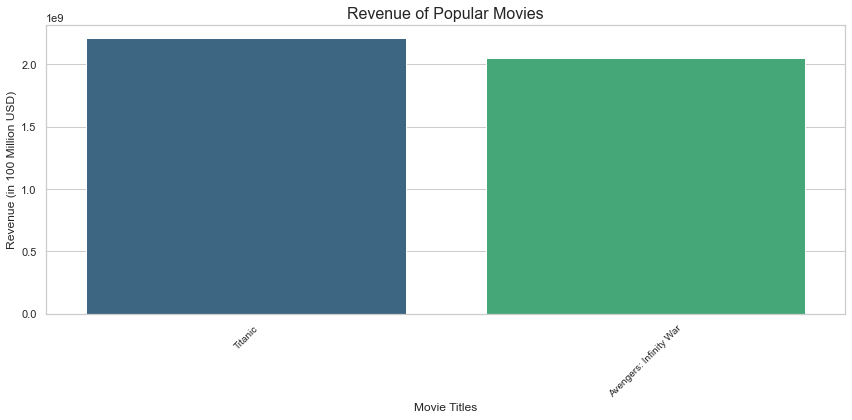

In [187]:
#Histogram to determine highest revenues
sns.set_theme(style="whitegrid")

top_10_revenues = matched_df.nlargest(10,"worldwide_gross")

top_10_revenues = top_10_revenues.sort_values("worldwide_gross", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="original_title", y="worldwide_gross", data=top_10_revenues, palette="viridis")


plt.title("Revenue of Popular Movies", fontsize=16)
plt.xlabel("Movie Titles", fontsize=12)
plt.ylabel("Revenue (in 100 Million USD)", fontsize=12)


plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

There were several titles that generated high revenues with Titanic being the highest

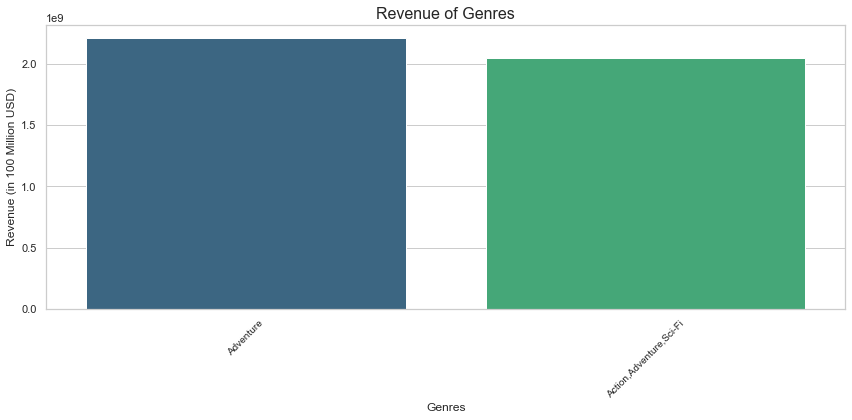

In [188]:
sns.set_theme(style="whitegrid")

top_10_revenues = matched_df.nlargest(10,"worldwide_gross")

top_10_revenues = top_10_revenues.sort_values("worldwide_gross", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="genres", y="worldwide_gross", data=top_10_revenues, palette="viridis")


plt.title("Revenue of Genres", fontsize=16)
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Revenue (in 100 Million USD)", fontsize=12)


plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

Adventure, Action and Scii-fi brought the highest revenue

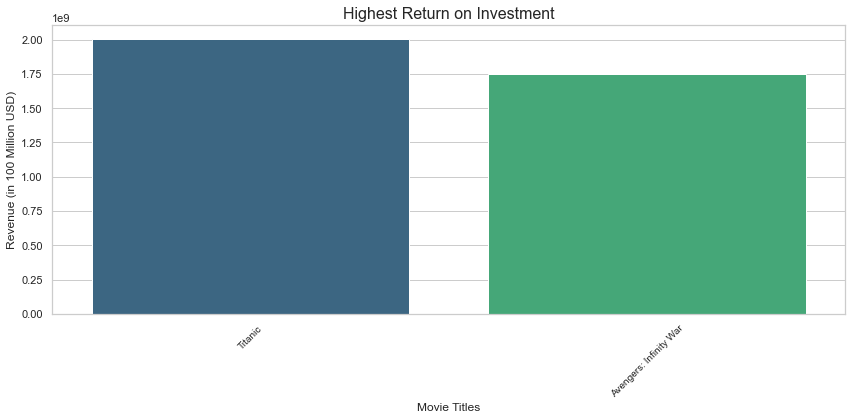

In [189]:
#Histogram to determine highest return on investment
sns.set_theme(style="whitegrid")

top_10_revenues = matched_df.nlargest(10,"gross_earnings")

top_10_revenues = top_10_revenues.sort_values("gross_earnings", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="original_title", y="gross_earnings", data=top_10_revenues, palette="viridis")


plt.title("Highest Return on Investment", fontsize=16)
plt.xlabel("Movie Titles", fontsize=12)
plt.ylabel("Revenue (in 100 Million USD)", fontsize=12)


plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

The highest returns were still the movies with the highest revenue 

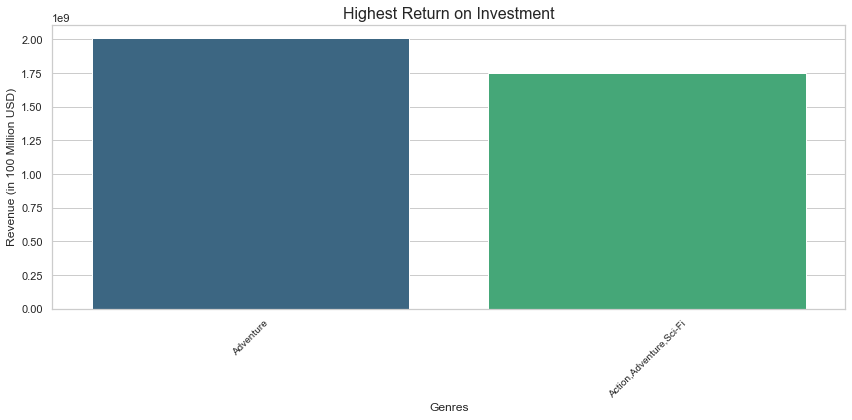

In [190]:
#Histogram to determine highest return on investment
sns.set_theme(style="whitegrid")

top_10_revenues = matched_df.nlargest(10,"gross_earnings")

top_10_revenues = top_10_revenues.sort_values("gross_earnings", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="genres", y="gross_earnings", data=top_10_revenues, palette="viridis")


plt.title("Highest Return on Investment", fontsize=16)
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Revenue (in 100 Million USD)", fontsize=12)


plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

Adventure, Action and Scii-fi brought the highest returen on investment

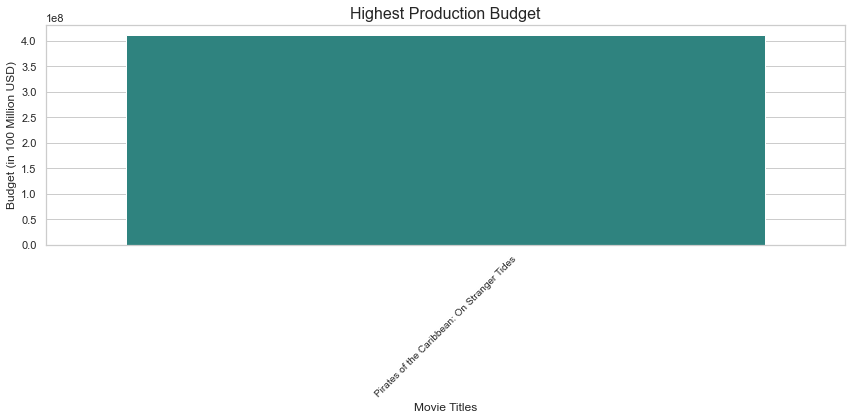

In [191]:
#Histogram to determine production budget
sns.set_theme(style="whitegrid")

top_10_revenues = matched_df.nlargest(10,"production_budget")

top_10_revenues = top_10_revenues.sort_values("production_budget", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="original_title", y="production_budget", data=top_10_revenues, palette="viridis")


plt.title("Highest Production Budget", fontsize=16)
plt.xlabel("Movie Titles", fontsize=12)
plt.ylabel("Budget (in 100 Million USD)", fontsize=12)


plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

High production budget do not necessarily equate revenue generation

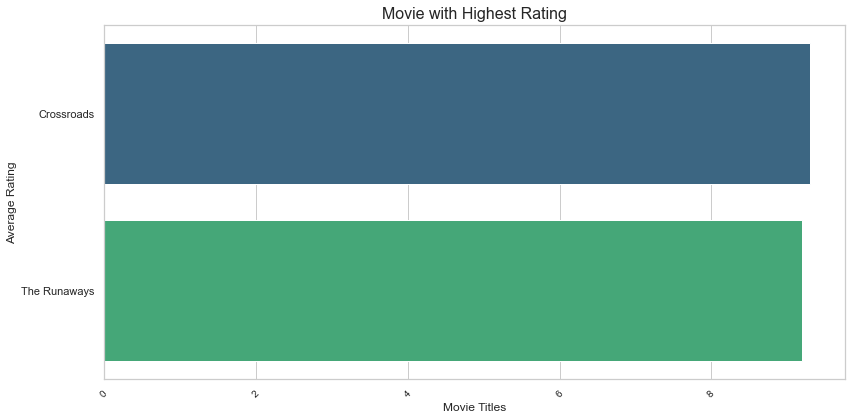

In [192]:

sns.set_theme(style="whitegrid")

top_10_revenues = matched_df.nlargest(10,"averagerating")

top_10_revenues = top_10_revenues.sort_values("averagerating", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="averagerating", y="original_title", data=top_10_revenues, palette="viridis",orient="h")


plt.title("Movie with Highest Rating", fontsize=16)
plt.xlabel("Movie Titles", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)


plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


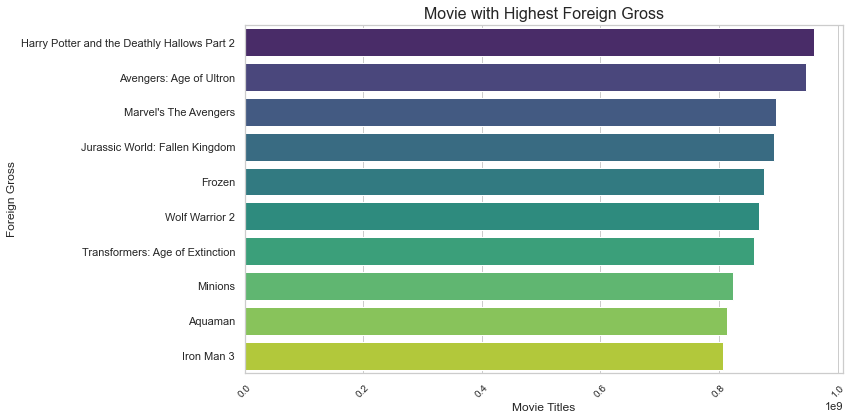

In [193]:
sns.set_theme(style="whitegrid")

top_10_revenues = df_gross.nlargest(10,"foreign_gross")

top_10_revenues = top_10_revenues.sort_values("foreign_gross", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="foreign_gross", y="title", data=top_10_revenues, palette="viridis",orient="h")


plt.title("Movie with Highest Foreign Gross", fontsize=16)
plt.xlabel("Movie Titles", fontsize=12)
plt.ylabel("Foreign Gross", fontsize=12)


plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


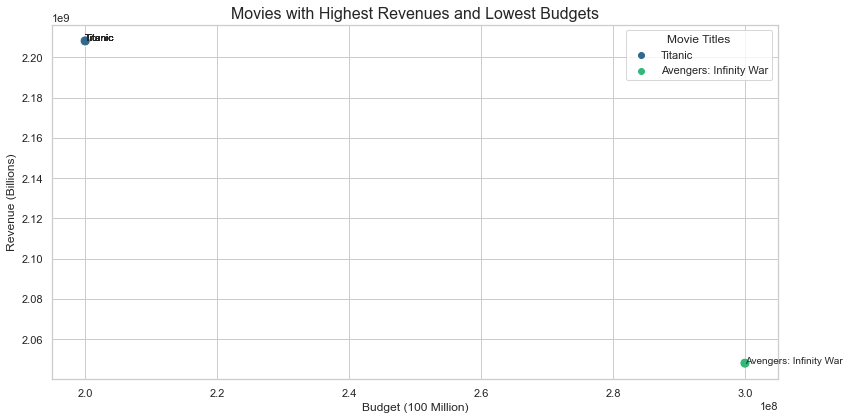

In [194]:


# Filter movies with the highest revenues but the lowest budgets
df_sorted = matched_df.sort_values(by=["worldwide_gross", "production_budget"], ascending=[False, True]).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x="production_budget", y="worldwide_gross", hue="original_title", data=df_sorted, palette="viridis", s=100
)

# Add labels for movies
for i in range(len(df_sorted)):
    plt.text(
        x=df_sorted["production_budget"].iloc[i] + 0.5,
        y=df_sorted["worldwide_gross"].iloc[i],
        s=df_sorted["original_title"].iloc[i],
        fontsize=10
    )

# Title and labels
plt.title("Movies with Highest Revenues and Lowest Budgets", fontsize=16)
plt.xlabel("Budget (100 Million)", fontsize=12)
plt.ylabel("Revenue (Billions)", fontsize=12)
plt.legend(title="Movie Titles")
plt.tight_layout()

# Show plot
plt.show()

There is consistency in data sources showing the total highest foreign gross for movies such as Avengers and Jurassic World

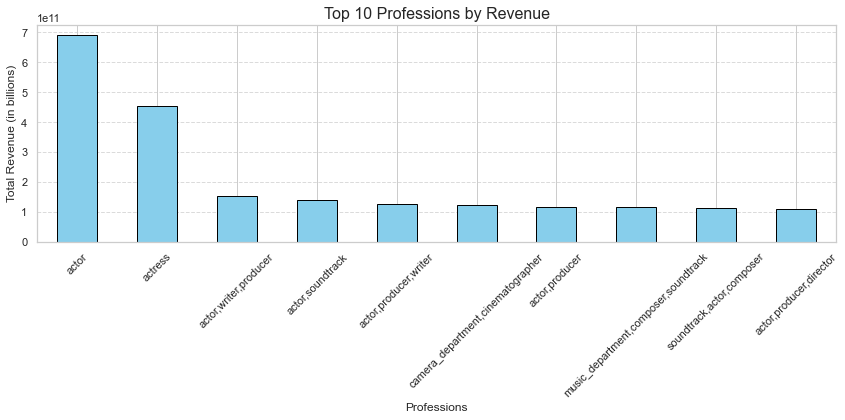

In [197]:
director_revenue = matched_df.groupby('primary_profession')['worldwide_gross'].sum().sort_values(ascending=False)

# Select the top 10 directors
top_10_directors = director_revenue.head(10)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
top_10_directors.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Top 10 Professions by Revenue', fontsize=16)
plt.xlabel('Professions', fontsize=12)
plt.ylabel('Total Revenue (in billions)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y',
linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [209]:
# Group by profession and person_name, sum the revenue, and sort
profession_revenue = matched_df.groupby(['primary_profession', 'primary_name'])['worldwide_gross'].sum().reset_index().head(20)

# Sort within each profession and get the top 3 people by revenue
top_3_people_by_profession = profession_revenue.sort_values(['primary_profession', 'worldwide_gross'], ascending=[True, False])
# Get the top 3 for each profession
top_3_people_by_profession = top_3_people_by_profession.groupby('primary_profession').head(3)
print (top_3_people_by_profession)

# # Plot the top 3 people by profession using a bar plot
# plt.figure(figsize=(14, 8))

# # Create the bar plot with seaborn for better visuals
# sns.barplot(
#     data=top_3_people_by_profession, 
#     x='worldwide_gross', 
#     y='primary_name', 
#     hue='primary_profession', 
#     palette='viridis'
# )
# # Add titles and labels
# plt.title('Top 3 Revenue-Generating People by Profession', fontsize=16)
# plt.xlabel('Total Revenue (in billions)', fontsize=12)
# plt.ylabel('Person Name', fontsize=12)
# plt.legend(title='Profession', loc='best')

# # Show the plot
# plt.show()

  primary_profession    primary_name  worldwide_gross
9              actor  Aaron McCusker      894985342.0
4              actor    Aaron Berger      286896578.0
0              actor         $hutter      270370007.0


In [212]:
grouped_data = matched_df.groupby(['primary_profession', 'primary_name'])['worldwide_gross'].sum().reset_index()

# Sort by Revenue within each Profession and get the top 3 for each
top_3_per_profession = grouped_data.sort_values(['primary_profession', 'worldwide_gross'], ascending=[True, False]).groupby('primary_profession').head(3)

# Plotting
plt.figure(figsize=(12, 6))
for profession in top_3_per_profession['primary_profession'].unique():
    profession_data = top_3_per_profession[top_3_per_profession['primary_profession'] == profession]
    plt.bar(profession_data['primary_name'], profession_data['worldwide_gross'], label=profession)

# Add titles and labels
plt.title('Top 3 Individuals by Profession and Revenue', fontsize=16)
plt.xlabel('Name', fontsize=12)
plt.ylabel('Total Revenue (in billions)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Profession')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
fcq-oawp-dis

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000025207D53700> (for post_execute):


KeyboardInterrupt: 

In [224]:
unique_professions = matched_df['primary_profession'].value_counts()
unique_professions

actor                                                    4427
actress                                                  3049
actor,writer,producer                                     743
actor,producer                                            678
producer                                                  669
                                                         ... 
production_designer,art_department,make_up_department       1
art_department,cinematographer,camera_department            1
editor,animation_department,art_department                  1
producer,music_department,manager                           1
director,visual_effects,writer                              1
Name: primary_profession, Length: 3541, dtype: int64

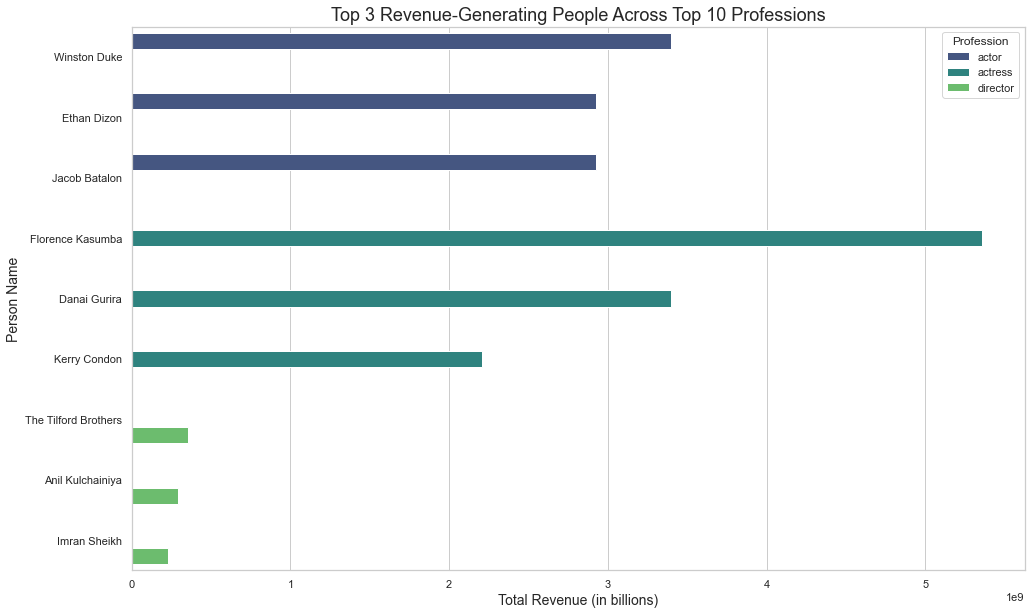

In [228]:
professions_of_interest = ['director', 'actor', 'actress']

# Filter data to include only the specified professions
filtered_data = matched_df[matched_df['primary_profession'].isin(professions_of_interest)]

# Group by profession and person_name, sum the revenue, and sort
profession_revenue = filtered_data.groupby(['primary_profession', 'primary_name'])['worldwide_gross'].sum().reset_index()

# Sort within each profession by revenue
top_people_by_profession = profession_revenue.sort_values(['primary_profession', 'worldwide_gross'], ascending=[True, False])

# Get the top 3 people for each of the top 10 professions
top_3_people_by_top_10_professions = top_people_by_profession.groupby('primary_profession').head(3)

# Plot the top 3 people across the top 10 professions
plt.figure(figsize=(16, 10))
# Create the bar plot
sns.barplot(
    data=top_3_people_by_top_10_professions, 
    x='worldwide_gross', 
    y='primary_name', 
    hue='primary_profession', 
    palette='viridis'
)

# Add titles and labels
plt.title('Top 3 Revenue-Generating People Across Top 10 Professions', fontsize=18)
plt.xlabel('Total Revenue (in billions)', fontsize=14)
plt.ylabel('Person Name', fontsize=14)
plt.legend(title='Profession', loc='best')

# Show the plot
plt.show()

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***